# Financial Data Analysis

## Loading Financial Data from the Web

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import scipy.stats as stats

pd.options.display.float_format = '{:.4f}'.format
plt.style.use("seaborn")

In [2]:
start = "2014-10-01"
end = "2021-05-31"

In [3]:
symbol = "BA"

In [4]:
df = yf.download(symbol, start, end)
df

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- BA: No data found for this date range, symbol may be delisted


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       0 non-null      float64
 1   High       0 non-null      float64
 2   Low        0 non-null      float64
 3   Close      0 non-null      float64
 4   Adj Close  0 non-null      float64
 5   Volume     0 non-null      float64
dtypes: float64(6)
memory usage: 0.0+ bytes


In [6]:
symbol = ["BA", "MSFT", "^DJI", "EURUSD=X", "GC=F", "BTC-USD"]

Ticker Symbols: <br>
- __BA__: Boeing (US Stock) 
- __MSFT__: Microsoft Corp (US Stock)
- __^DJI__: Dow Jones Industrial Average (US Stock Index)
- __EURUSD=X__: Exchange Rate for Currency Pair EUR/USD (Forex)
- __GC=F__: Gold Price (Precious Metal / Commodity)
- __BTC-USD__: Bitcoin in USD (Cryptocurrency)

In [7]:
df = yf.download(symbol, start, end)
df

[*********************100%***********************]  6 of 6 completed

6 Failed downloads:
- MSFT: No data found for this date range, symbol may be delisted
- ^DJI: No data found for this date range, symbol may be delisted
- BA: No data found for this date range, symbol may be delisted
- GC=F: No data found for this date range, symbol may be delisted
- BTC-USD: No data found for this date range, symbol may be delisted
- EURUSD=X: No data found for this date range, symbol may be delisted


Empty DataFrame
Columns: [(Adj Close, BA), (Adj Close, BTC-USD), (Adj Close, EURUSD=X), (Adj Close, GC=F), (Adj Close, MSFT), (Adj Close, ^DJI), (Close, BA), (Close, BTC-USD), (Close, EURUSD=X), (Close, GC=F), (Close, MSFT), (Close, ^DJI), (High, BA), (High, BTC-USD), (High, EURUSD=X), (High, GC=F), (High, MSFT), (High, ^DJI), (Low, BA), (Low, BTC-USD), (Low, EURUSD=X), (Low, GC=F), (Low, MSFT), (Low, ^DJI), (Open, BA), (Open, BTC-USD), (Open, EURUSD=X), (Open, GC=F), (Open, MSFT), (Open, ^DJI), (Volume, BA), (Volume, BTC-USD), (Volume, EURUSD=X), (Volume, GC=F), (Volume, MSFT), (Volume, ^DJI)]
Index: []

[0 rows x 36 columns]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   (Adj Close, BA)        0 non-null      float64
 1   (Adj Close, BTC-USD)   0 non-null      float64
 2   (Adj Close, EURUSD=X)  0 non-null      float64
 3   (Adj Close, GC=F)      0 non-null      float64
 4   (Adj Close, MSFT)      0 non-null      float64
 5   (Adj Close, ^DJI)      0 non-null      float64
 6   (Close, BA)            0 non-null      float64
 7   (Close, BTC-USD)       0 non-null      float64
 8   (Close, EURUSD=X)      0 non-null      float64
 9   (Close, GC=F)          0 non-null      float64
 10  (Close, MSFT)          0 non-null      float64
 11  (Close, ^DJI)          0 non-null      float64
 12  (High, BA)             0 non-null      float64
 13  (High, BTC-USD)        0 non-null      float64
 14  (High, EURUSD=X)       0 non-null      float64
 15  (High, GC=F)           

In [9]:
df.to_csv("multi_assets.csv")

## Initial Inspection and Visualization

In [10]:
df = pd.read_csv("multi_assets.csv", header = [0, 1], index_col = 0, parse_dates = [0])
df

Empty DataFrame
Columns: [(Adj Close, BA), (Adj Close, BTC-USD), (Adj Close, EURUSD=X), (Adj Close, GC=F), (Adj Close, MSFT), (Adj Close, ^DJI), (Close, BA), (Close, BTC-USD), (Close, EURUSD=X), (Close, GC=F), (Close, MSFT), (Close, ^DJI), (High, BA), (High, BTC-USD), (High, EURUSD=X), (High, GC=F), (High, MSFT), (High, ^DJI), (Low, BA), (Low, BTC-USD), (Low, EURUSD=X), (Low, GC=F), (Low, MSFT), (Low, ^DJI), (Open, BA), (Open, BTC-USD), (Open, EURUSD=X), (Open, GC=F), (Open, MSFT), (Open, ^DJI), (Volume, BA), (Volume, BTC-USD), (Volume, EURUSD=X), (Volume, GC=F), (Volume, MSFT), (Volume, ^DJI)]
Index: []

[0 rows x 36 columns]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   (Adj Close, BA)        0 non-null      object
 1   (Adj Close, BTC-USD)   0 non-null      object
 2   (Adj Close, EURUSD=X)  0 non-null      object
 3   (Adj Close, GC=F)      0 non-null      object
 4   (Adj Close, MSFT)      0 non-null      object
 5   (Adj Close, ^DJI)      0 non-null      object
 6   (Close, BA)            0 non-null      object
 7   (Close, BTC-USD)       0 non-null      object
 8   (Close, EURUSD=X)      0 non-null      object
 9   (Close, GC=F)          0 non-null      object
 10  (Close, MSFT)          0 non-null      object
 11  (Close, ^DJI)          0 non-null      object
 12  (High, BA)             0 non-null      object
 13  (High, BTC-USD)        0 non-null      object
 14  (High, EURUSD=X)       0 non-null      object
 15  (High, GC=F)           0 non-null      o

In [12]:
df.Close # outer index level

,BA,BTC-USD,EURUSD=X,GC=F,MSFT,^DJI
Date,,,,,,


In [13]:
df.Close.BA # one column (1)

Series([], Name: BA, dtype: object)

In [14]:
df.loc[:, ("Close", "BA")] # one column (2)

Series([], Name: (Close, BA), dtype: object)

In [16]:
df.loc["2015"] # one year

KeyError: '2015'

In [ ]:
df.loc["2020-06":, ("Close", "BA")] # one month for one column

In [ ]:
df = df.swaplevel(axis = "columns").sort_index(axis = "columns") # swap outer and inner index
df

In [ ]:
df["EURUSD=X"]

In [ ]:
df["BTC-USD"]

In [ ]:
df = df.swaplevel(axis = "columns").sort_index(axis = "columns") # swap outer and inner index
df

In [ ]:
close = df.Close.copy() # select daily close prices only
close

In [ ]:
close.describe()

In [ ]:
close.BA.dropna().plot(figsize = (15, 8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

In [17]:
close.dropna().plot(figsize = (15, 8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

NameError: name 'close' is not defined

__Take Home: Absolute Prices are absolutely meaningless/useless (in most cases)__ <br>
- Prices that are on a different scale are hard to compare 
- A higher Price does not imply a higher value or a better performance

## Normalizing Financial Time Series to a Base Value (100)

__-> all instruments start at the very same Level (Base Value)__

In [ ]:
close

In [ ]:
close.iloc[0,0] # first price BA

In [ ]:
close.BA.div(close.iloc[0,0]).mul(100)

In [ ]:
close.iloc[0] # first Price all tickers

In [18]:
norm = close.div(close.iloc[0]).mul(100)
norm

NameError: name 'close' is not defined

In [ ]:
norm.dropna().plot(figsize = (15, 8), fontsize = 13, logy = True)
plt.legend(fontsize = 13)
plt.show()

In [ ]:
close.to_csv("close.csv")

## Price Changes and Financial Returns

__More meaningful/useful than Prices: Price changes__

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.4f}'.format
plt.style.use("seaborn")

In [ ]:
close = pd.read_csv("close.csv", index_col = "Date", parse_dates = ["Date"])
close

In [19]:
msft = close.MSFT.dropna().to_frame().copy()

NameError: name 'close' is not defined

In [ ]:
msft

In [ ]:
msft.rename(columns = {"MSFT":"Price"}, inplace = True)

In [ ]:
msft

In [20]:
msft.shift(periods = 1)

NameError: name 'msft' is not defined

In [ ]:
msft["P_lag1"] = msft.shift(periods = 1)
msft

__Absolute Price Changes__ (Difference)

In [ ]:
msft["P_diff2"] = msft.Price.diff(periods = 1)  # Alternative 2

In [ ]:
msft

In [21]:
msft.P_diff.equals(msft.P_diff2)

NameError: name 'msft' is not defined

__-> Absolute Price Changes are not meaningful__

__Relative/Percentage Price Changes__ (Returns)

In [ ]:
msft.Price.div(msft.P_lag1) - 1 # Alternative 1

In [ ]:
msft.drop(columns = ["P_lag1", "P_diff", "P_diff2"], inplace = True)

In [ ]:
msft

In [22]:
msft.to_csv("msft.csv")

NameError: name 'msft' is not defined

## Measuring Reward and Risk of an Investment

__General Rule in Finance/Investing: Higher Risk must be rewarded with higher Returns__.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.4f}'.format
plt.style.use("seaborn")

In [ ]:
msft = pd.read_csv("msft.csv", index_col = "Date", parse_dates = ["Date"])
msft

In [23]:
msft.Price.plot(figsize = (15, 8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

NameError: name 'msft' is not defined

- Reward: Positive Returns
- Risk: Volatility of Returns

In [ ]:
msft.describe()

In [ ]:
mu = msft.Returns.mean() # arithmetic mean return -> Reward
mu

In [24]:
sigma = msft.Returns.std() # standard deviation of returns -> Risk/Volatility
sigma

NameError: name 'msft' is not defined

In [ ]:
np.sqrt(msft.Returns.var())

## Investment Multiple and CAGR 

__Two alternative reward metrics that are more intuitive and easier to interpret.__

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.4f}'.format
plt.style.use("seaborn")

In [25]:
msft = pd.read_csv("msft.csv", index_col = "Date", parse_dates = ["Date"])
msft

,Price,Returns
Date,,
2014-10-01,45.9000,NaN
2014-10-02,45.7600,-0.0031
2014-10-03,46.0900,0.0072
2014-10-06,46.0900,0.0000
2014-10-07,45.5300,-0.0122
...,...,...
2021-05-24,250.7800,0.0229
2021-05-25,251.7200,0.0037
2021-05-26,251.4900,-0.0009


__Investment Multiple__: Ending Value of 1 [Dollar] invested. <br>
Multiple = Ending Value / Initial Investment

In [26]:
multiple = (msft.Price[-1] / msft.Price[0])
multiple

5.43965107571966

__Price Increase (in %)__

In [27]:
msft.Price / msft.Price[0] # similar/identical concept: Normalized Price with Base Value 1

Date
2014-10-01   1.0000
2014-10-02   0.9969
2014-10-03   1.0041
2014-10-06   1.0041
2014-10-07   0.9919
              ...  
2021-05-24   5.4636
2021-05-25   5.4841
2021-05-26   5.4791
2021-05-27   5.4316
2021-05-28   5.4397
Name: Price, Length: 1677, dtype: float64

__Drawback of Investment Multiple: Doesn´t take into account investment Period. Meaningful only in conjunction with Investment Period.__

__Compound Annual Growth Rate (CAGR)__: The (constant annual) rate of return that would be required for an investment to grow from its beginning balance to its ending balance, assuming the profits were reinvested at the end of each year of the investment's lifespan. (Wikipedia)

In [28]:
start = msft.index[0]
start

Timestamp('2014-10-01 00:00:00')

In [29]:
end = msft.index[-1]
end

Timestamp('2021-05-28 00:00:00')

In [30]:
td = end - start
td

Timedelta('2431 days 00:00:00')

In [31]:
td_years = td.days / 365.25
td_years

6.655715263518139

In [32]:
cagr = multiple**(1 / td_years) - 1 # short version
cagr

0.2897846506194157

In [33]:
cagr = (msft.Price[-1]/msft.Price[0])**(1/((msft.index[-1] - msft.index[0]).days / 365.25)) - 1 # long
cagr

0.2897846506194157

__-> CAGR can be used to compare Investments with different investment horizons.__

## Compound Returns & Geometric Mean Return

In [34]:
msft

,Price,Returns
Date,,
2014-10-01,45.9000,NaN
2014-10-02,45.7600,-0.0031
2014-10-03,46.0900,0.0072
2014-10-06,46.0900,0.0000
2014-10-07,45.5300,-0.0122
...,...,...
2021-05-24,250.7800,0.0229
2021-05-25,251.7200,0.0037
2021-05-26,251.4900,-0.0009


In [35]:
multiple = (1 + msft.Returns).prod() # alternative #3 to calculate multiple (compounding daily returns)
multiple

5.4396510757198575

In [36]:
n = msft.Returns.count()
n

1676

In [37]:
geo_mean = multiple**(1/n) - 1 # Geometric mean return (daily)
geo_mean

0.0010110805580043625

In [38]:
(1 + geo_mean)**n # to calculate multiple (geometric mean)

5.439651075720363

__-> Compound returns, CAGR & geometric mean return are closely related concepts__.

In [39]:
mu = msft.Returns.mean() # arithmetic mean return
mu

0.0011597817982067049

__The arithmetic mean return is always greater than the geometric mean return... and less useful__. 

## Preview: Simple Returns vs. Logarithmic Returns (log returns)

Very often log returns are used instead of simple returns.<br>
- favourable characteristics of log returns
- drawbacks of simple returns

## Discrete Compounding

__Annual Compounding__ -> Interests accrue once a year at the end of the year

Your Savings Bank offers an interest rate of __8% p.a. (stated rate)__ with __annual compounding__ on your savings (__USD 100__).<br>
Calculate the __value__ of your savings account __after one year__ and the corresponding __effective annual interest rate__. 

__-> Interests are calculated and added to your savings account once at the end of each year.__

In [40]:
PV = 100
r = 0.08
n = 1

In [41]:
100 * 1.08

108.0

In [42]:
FV = PV * (1 + r)**n
FV

108.0

In [43]:
effective_annual_rate = (FV / PV)**(1/n) - 1 
effective_annual_rate

0.08000000000000007

__Quarterly Compounding__ -> Interests accrue once a quarter at the end of the quarter

Your Savings Bank offers an interest rate of __8% p.a. (stated rate)__ with __quarterly compounding__ on your savings (__USD 100__).<br>
Calculate the __value__ of your savings account __after one year__ and the corresponding __effective annual interest rate__. 

__-> Interests are calculated and added to your savings account at the end of each quarter.__

In [44]:
PV = 100
r = 0.08
n = 1
m = 4

In [45]:
100 * 1.02 * 1.02 * 1.02 * 1.02

108.243216

In [46]:
FV = PV * (1 + r/m)**(n*m)
FV

108.243216

In [47]:
effective_annual_rate = (FV / PV)**(1/n) - 1 
effective_annual_rate

0.08243215999999998

__-> Quarterly compounding is favourable (everything else equal) as we earn compound interest (interest on interest).__

__Monthly Compounding__ -> Interests accrue once a month at the end of the month

Your Savings Bank offers an interest rate of __8% p.a. (stated rate)__ with __monthly compounding__ on your savings (__USD 100__).<br>
Calculate the __value__ of your savings account __after one year__ and the corresponding __effective annual interest rate__. 

__-> Interests are calculated and added to your savings account at the end of each month.__

In [48]:
PV = 100
r = 0.08
n = 1
m = 12

In [49]:
FV = PV * (1 + r/m)**(n*m)
FV

108.29995068075098

In [50]:
effective_annual_rate = ((FV / PV)**(1/n) - 1) 
effective_annual_rate

0.08299950680750978

## Continuous Compounding 

Your Savings Bank offers an interest rate of __8% p.a. (stated rate)__ with __continuous compounding__ on your savings (__USD 100__).<br>
Calculate the __value__ of your savings account __after one year__ and the corresponding __effective annual interest rate__. 

__-> Interests are calculated and added to your savings account continuously (infinitely large number of compounding events).__ -> continuous exponential growth that can be observed in nature

In [51]:
PV = 100
r = 0.08
n = 1
m = 100000 # approx.infinity

In [52]:
FV = PV * (1 + r/m)**(n*m) # approx. with large m
FV

108.32870330122834

In [53]:
FV = PV * np.exp(n * r) # exact math with e (euler number)
FV

108.32870676749586

In [54]:
euler = np.exp(1)
euler

2.718281828459045

In [55]:
PV * euler**(n * r)

108.32870676749586

In [56]:
effective_annual_rate = ((FV / PV)**(1/n) - 1) # Alt 1
effective_annual_rate

0.08328706767495864

In [57]:
effective_annual_rate = np.exp(r) - 1 # Alt 2
effective_annual_rate

0.08328706767495864

Let´s assume we only observe PV and FV, how to calculate the stated rate/continuously compounded rate of 8%?

In [58]:
r = np.log(FV / PV) # inverse calculation -> use log (Alt 1)
r

0.08000000000000007

In [59]:
r = np.log(effective_annual_rate + 1) # inverse calculation -> use log (Alt 2)
r

0.08000000000000007

__Take Home: Prices of traded Financial Instruments change (approx.) continuously. <br>
-> Intuitively, it makes a lot of sense to work with log returns.__ 

## Log Returns

In [60]:
msft = pd.read_csv("msft.csv", index_col = "Date", parse_dates = ["Date"])
msft

,Price,Returns
Date,,
2014-10-01,45.9000,NaN
2014-10-02,45.7600,-0.0031
2014-10-03,46.0900,0.0072
2014-10-06,46.0900,0.0000
2014-10-07,45.5300,-0.0122
...,...,...
2021-05-24,250.7800,0.0229
2021-05-25,251.7200,0.0037
2021-05-26,251.4900,-0.0009


In [61]:
msft["log_ret"] = np.log(msft.Price / msft.Price.shift()) # daily log returns

In [62]:
msft

,Price,Returns,log_ret
Date,,,
2014-10-01,45.9000,NaN,NaN
2014-10-02,45.7600,-0.0031,-0.0031
2014-10-03,46.0900,0.0072,0.0072
2014-10-06,46.0900,0.0000,0.0000
2014-10-07,45.5300,-0.0122,-0.0122
...,...,...,...
2021-05-24,250.7800,0.0229,0.0226
2021-05-25,251.7200,0.0037,0.0037
2021-05-26,251.4900,-0.0009,-0.0009


In [63]:
msft.describe()

,Price,Returns,log_ret
count,1677.0000,1676.0000,1676.0000
mean,106.3144,0.0012,0.0010
std,60.7722,0.0173,0.0172
min,40.2900,-0.1474,-0.1595
25%,54.8300,-0.0062,-0.0062
50%,89.7100,0.0009,0.0009
75%,138.9000,0.0091,0.0091
max,261.9700,0.1422,0.1329


In [64]:
mu = msft.log_ret.mean() # mean log return -> Reward
mu

0.0010105697603329637

In [65]:
sigma = msft.log_ret.std() # standard deviation of log returns -> Risk/Volatility
sigma

0.01724882682847896

## Simple Returns vs Log Returns

In [66]:
df = pd.DataFrame(data = [100, 50, 90], columns = ["Price"])
df

,Price
0,100
1,50
2,90


In [67]:
df["SR"] = df.Price.pct_change() # simple returns

In [68]:
df["LR"] = np.log(df.Price / df.Price.shift()) # log returns

In [69]:
df

,Price,SR,LR
0,100,NaN,NaN
1,50,-0.5000,-0.6931
2,90,0.8000,0.5878


In [70]:
periods = df.SR.count()
periods

2

__The arithmetic mean of simple returns can be misleading!__

In [71]:
mean_sr = df.SR.mean()
mean_sr

0.15000000000000002

__We should use Compound Simple Returns / Geometric Mean, or even better...__

In [72]:
geo_mean = (1 + df.SR).prod()**(1 / periods) - 1
geo_mean

-0.05131670194948623

In [73]:
100 * (1 + geo_mean)**periods # correct!!!

89.99999999999999

__...Log Returns which are additive over time!__

In [74]:
sum_lr = df.LR.sum()
sum_lr

-0.10536051565782623

In [75]:
100 * np.exp(sum_lr) # correct!!!

90.0

In [76]:
mean_lr = df.LR.mean()
mean_lr

-0.05268025782891311

In [77]:
100 * np.exp(mean_lr * periods) # correct!!!

90.0

__Take Home: Log Returns are additive over time. Simple Returns are not additive over time (but they can be multiplied/compounded)__

## Simple Returns vs. Log Returns (Part 2)

In [78]:
msft = pd.read_csv("msft.csv", index_col = "Date", parse_dates = ["Date"])

In [79]:
msft["log_ret"] = np.log(msft.Price / msft.Price.shift())

In [80]:
msft

,Price,Returns,log_ret
Date,,,
2014-10-01,45.9000,NaN,NaN
2014-10-02,45.7600,-0.0031,-0.0031
2014-10-03,46.0900,0.0072,0.0072
2014-10-06,46.0900,0.0000,0.0000
2014-10-07,45.5300,-0.0122,-0.0122
...,...,...,...
2021-05-24,250.7800,0.0229,0.0226
2021-05-25,251.7200,0.0037,0.0037
2021-05-26,251.4900,-0.0009,-0.0009


__Investment Multiple__

In [81]:
msft.Returns.add(1).prod() # compounding simple returns ("compound returns")

5.4396510757198575

In [82]:
np.exp(msft.log_ret.sum())  # adding log returns ("cumulative returns")

5.439651075719645

__Normalized Prices with Base 1__

In [83]:
msft.Returns.add(1).cumprod() # compounding simple returns ("compound returns")

Date
2014-10-01      NaN
2014-10-02   0.9969
2014-10-03   1.0041
2014-10-06   1.0041
2014-10-07   0.9919
              ...  
2021-05-24   5.4636
2021-05-25   5.4841
2021-05-26   5.4791
2021-05-27   5.4316
2021-05-28   5.4397
Name: Returns, Length: 1677, dtype: float64

In [84]:
np.exp(msft.log_ret.cumsum()) # adding log returns ("cumulative returns")

Date
2014-10-01      NaN
2014-10-02   0.9969
2014-10-03   1.0041
2014-10-06   1.0041
2014-10-07   0.9919
              ...  
2021-05-24   5.4636
2021-05-25   5.4841
2021-05-26   5.4791
2021-05-27   5.4316
2021-05-28   5.4397
Name: log_ret, Length: 1677, dtype: float64

In [85]:
msft.log_ret.cumsum().apply(np.exp) # adding log returns ("cumulative returns")

Date
2014-10-01      NaN
2014-10-02   0.9969
2014-10-03   1.0041
2014-10-06   1.0041
2014-10-07   0.9919
              ...  
2021-05-24   5.4636
2021-05-25   5.4841
2021-05-26   5.4791
2021-05-27   5.4316
2021-05-28   5.4397
Name: log_ret, Length: 1677, dtype: float64

__CAGR__

In [86]:
(msft.Price[-1]/msft.Price[0])**(1/((msft.index[-1] - msft.index[0]).days / 365.25)) - 1

0.2897846506194157

In [87]:
trading_days_year = msft.Returns.count() / ((msft.index[-1] - msft.index[0]).days / 365.25)
trading_days_year

251.81365693130397

In [88]:
np.exp(msft.log_ret.mean() * trading_days_year) - 1 # correct with mean of daily log returns!

0.28978465061941483

In [89]:
msft.Returns.mean() * trading_days_year # incorrect with mean of daily simple returns!

0.292048895848794

In [90]:
np.exp(msft.log_ret.mean() * 252) - 1 # good approximation (for us stocks)

0.2900275562814376

## Performance Comparison

__General Rule in Finance/Investing: Higher Risk must be rewarded with higher Returns__.

__Which instrument(s) performed best/worst in the past in terms of risk & return?__

In [91]:
close = pd.read_csv("close.csv", index_col = "Date", parse_dates = ["Date"])
close

,BA,BTC-USD,EURUSD=X,GC=F,MSFT,^DJI
Date,,,,,,
2014-10-01,124.6700,383.6150,1.2628,1214.6000,45.9000,16804.7109
2014-10-02,124.1700,375.0720,1.2624,1214.2000,45.7600,16801.0508
2014-10-03,126.3600,359.5120,1.2671,1192.2000,46.0900,17009.6895
2014-10-04,NaN,328.8660,NaN,NaN,NaN,NaN
2014-10-05,NaN,320.5100,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2021-05-27,250.7000,38436.9688,1.2193,1895.7000,249.3100,34464.6406
2021-05-28,247.0200,35697.6055,1.2193,1902.5000,249.6800,34529.4492
2021-05-29,NaN,34616.0664,NaN,NaN,NaN,NaN


In [92]:
close.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2435 entries, 2014-10-01 to 2021-05-31
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BA        1677 non-null   float64
 1   BTC-USD   2431 non-null   float64
 2   EURUSD=X  1716 non-null   float64
 3   GC=F      1662 non-null   float64
 4   MSFT      1677 non-null   float64
 5   ^DJI      1677 non-null   float64
dtypes: float64(6)
memory usage: 133.2 KB


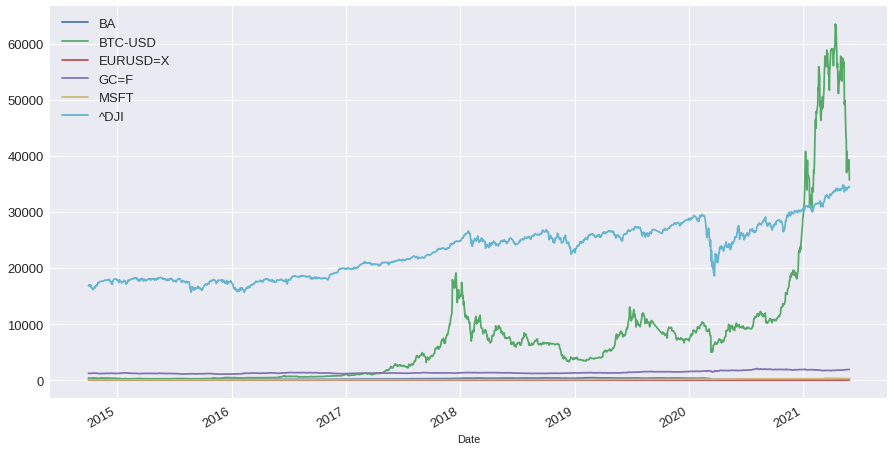

In [93]:
close.dropna().plot(figsize = (15, 8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

In [94]:
np.log(close / close.shift()).info() # keep NaN

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2435 entries, 2014-10-01 to 2021-05-31
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BA        1312 non-null   float64
 1   BTC-USD   2427 non-null   float64
 2   EURUSD=X  1366 non-null   float64
 3   GC=F      1304 non-null   float64
 4   MSFT      1312 non-null   float64
 5   ^DJI      1312 non-null   float64
dtypes: float64(6)
memory usage: 133.2 KB


In [95]:
close.apply(lambda x: np.log(x.dropna() / x.dropna().shift())).info() # remove NaN

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2435 entries, 2014-10-01 to 2021-05-31
Freq: D
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BA        1676 non-null   float64
 1   BTC-USD   2430 non-null   float64
 2   EURUSD=X  1715 non-null   float64
 3   GC=F      1661 non-null   float64
 4   MSFT      1676 non-null   float64
 5   ^DJI      1676 non-null   float64
dtypes: float64(6)
memory usage: 133.2 KB


In [96]:
returns = close.apply(lambda x: np.log(x.dropna() / x.dropna().shift()))
returns

,BA,BTC-USD,EURUSD=X,GC=F,MSFT,^DJI
Date,,,,,,
2014-10-01,NaN,NaN,NaN,NaN,NaN,NaN
2014-10-02,-0.0040,-0.0225,-0.0003,-0.0003,-0.0031,-0.0002
2014-10-03,0.0175,-0.0424,0.0037,-0.0183,0.0072,0.0123
2014-10-04,NaN,-0.0891,NaN,NaN,NaN,NaN
2014-10-05,NaN,-0.0257,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2021-05-27,0.0379,-0.0221,-0.0046,-0.0029,-0.0087,0.0041
2021-05-28,-0.0148,-0.0739,0.0000,0.0036,0.0015,0.0019
2021-05-29,NaN,-0.0308,NaN,NaN,NaN,NaN


In [97]:
returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2435 entries, 2014-10-01 to 2021-05-31
Freq: D
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BA        1676 non-null   float64
 1   BTC-USD   2430 non-null   float64
 2   EURUSD=X  1715 non-null   float64
 3   GC=F      1661 non-null   float64
 4   MSFT      1676 non-null   float64
 5   ^DJI      1676 non-null   float64
dtypes: float64(6)
memory usage: 133.2 KB


In [98]:
returns.describe()

,BA,BTC-USD,EURUSD=X,GC=F,MSFT,^DJI
count,1676.0000,2430.0000,1715.0000,1661.0000,1676.0000,1676.0000
mean,0.0004,0.0019,-0.0000,0.0003,0.0010,0.0004
std,0.0263,0.0395,0.0051,0.0094,0.0172,0.0120
min,-0.2724,-0.4647,-0.0281,-0.0511,-0.1595,-0.1384
25%,-0.0092,-0.0124,-0.0031,-0.0042,-0.0062,-0.0034
50%,0.0007,0.0020,-0.0000,0.0003,0.0009,0.0007
75%,0.0105,0.0179,0.0029,0.0051,0.0091,0.0054
max,0.2177,0.2251,0.0281,0.0578,0.1329,0.1076


In [99]:
summary = returns.agg(["mean", "std"]).T
summary

,mean,std
BA,0.0004,0.0263
BTC-USD,0.0019,0.0395
EURUSD=X,-0.0000,0.0051
GC=F,0.0003,0.0094
MSFT,0.0010,0.0172
^DJI,0.0004,0.0120


In [100]:
summary.columns = ["Mean", "Std"]
summary

,Mean,Std
BA,0.0004,0.0263
BTC-USD,0.0019,0.0395
EURUSD=X,-0.0000,0.0051
GC=F,0.0003,0.0094
MSFT,0.0010,0.0172
^DJI,0.0004,0.0120


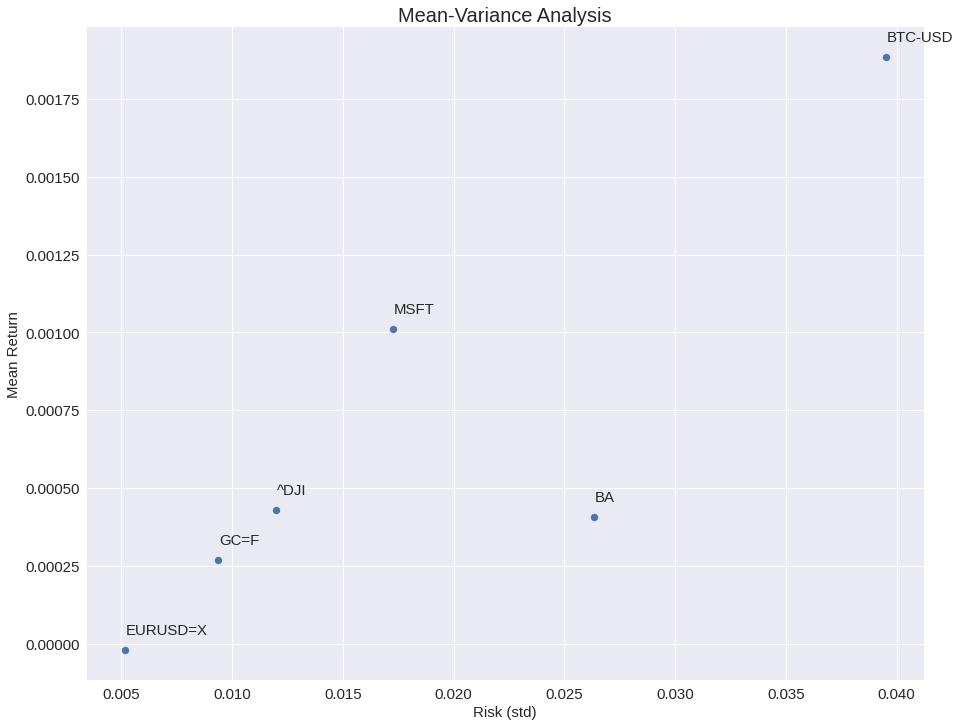

In [101]:
summary.plot(kind = "scatter", x = "Std", y = "Mean", figsize = (15,12), s = 50, fontsize = 15)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "Std"]+0.00005, summary.loc[i, "Mean"]+0.00005), size = 15)
plt.xlabel("Risk (std)", fontsize = 15)
plt.ylabel("Mean Return", fontsize = 15)
plt.title("Mean-Variance Analysis", fontsize = 20)
plt.show()

-> There is __no clear "best-performer"__ among ["EURUSD=X", "GC=F", "^DJI", "MSFT", "BTC-USD"] (without further analysis). __Higher risk__ is getting rewarded with __higher returns__. __BA underperformed__.

__Take Home: Mean-Variance Analysis has one major shortcoming: It assumes that financial returns follow a Normal Distribution. That´s (typically) not True.<br> -> Standard Deviation of Returns underestimates the true/full risk of an Investment as it fails to measure "Tail Risks".__ 

## Normality of Financial Returns 

In [102]:
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:.4f}'.format
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [103]:
msft = pd.read_csv("msft.csv", index_col = "Date", parse_dates = ["Date"])
msft

,Price,Returns
Date,,
2014-10-01,45.9000,NaN
2014-10-02,45.7600,-0.0031
2014-10-03,46.0900,0.0072
2014-10-06,46.0900,0.0000
2014-10-07,45.5300,-0.0122
...,...,...
2021-05-24,250.7800,0.0229
2021-05-25,251.7200,0.0037
2021-05-26,251.4900,-0.0009


In [104]:
msft["log_ret"] = np.log(msft.Price / msft.Price.shift()) 
msft

,Price,Returns,log_ret
Date,,,
2014-10-01,45.9000,NaN,NaN
2014-10-02,45.7600,-0.0031,-0.0031
2014-10-03,46.0900,0.0072,0.0072
2014-10-06,46.0900,0.0000,0.0000
2014-10-07,45.5300,-0.0122,-0.0122
...,...,...,...
2021-05-24,250.7800,0.0229,0.0226
2021-05-25,251.7200,0.0037,0.0037
2021-05-26,251.4900,-0.0009,-0.0009


In [105]:
msft.describe()

,Price,Returns,log_ret
count,1677.0000,1676.0000,1676.0000
mean,106.3144,0.0012,0.0010
std,60.7722,0.0173,0.0172
min,40.2900,-0.1474,-0.1595
25%,54.8300,-0.0062,-0.0062
50%,89.7100,0.0009,0.0009
75%,138.9000,0.0091,0.0091
max,261.9700,0.1422,0.1329


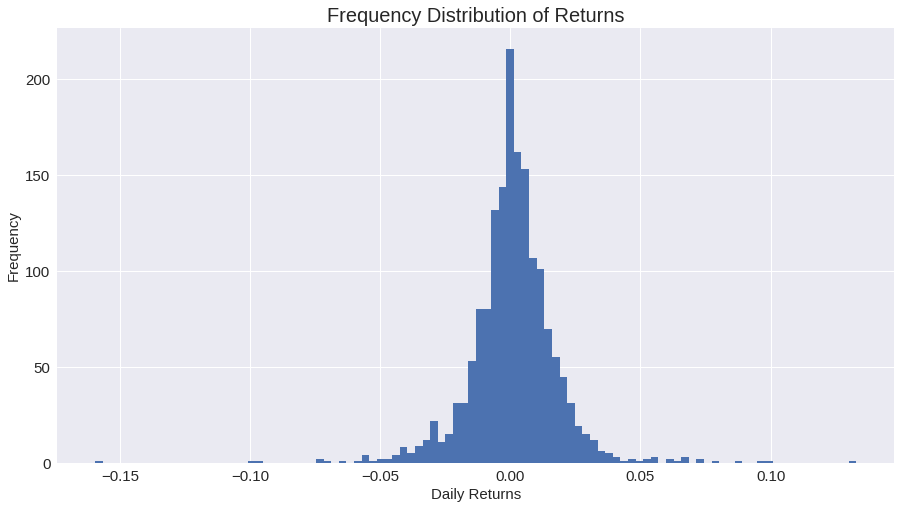

In [106]:
msft.log_ret.plot(kind = "hist", figsize = (15 ,8), bins = 100, fontsize = 15, density = False) # Frequency Distribution of log returns
plt.xlabel("Daily Returns", fontsize = 15)
plt.ylabel("Frequency", fontsize = 15)
plt.title("Frequency Distribution of Returns", fontsize = 20)
plt.show()

__Do MSFT Returns follow a Normal Distribution?__ <br><br>
A normally distributed random variable can be fully described by its 
- mean
- standard deviation

Higher Central Moments are zero:
- Skew = 0 (measures symmetrie around the mean)
- (Excess) Kurtosis = 0 (positve excess Kurtosis -> more observations in the "tails")

In [107]:
mu = msft.log_ret.mean()
mu

0.0010105697603329637

In [108]:
sigma = msft.log_ret.std()
sigma

0.01724882682847896

In [109]:
stats.skew(msft.log_ret.dropna()) # in a Normal Distribution: skew == 0

-0.20070528675208313

In [110]:
stats.kurtosis(msft.log_ret.dropna(), fisher = True) # in a Normal Distribution: (fisher) kurtosis == 0

10.733092631202133

__-> MSFT Returns exhibit "Fat Tails" (extreme positive/negative outcomes).__

In [111]:
x = np.linspace(msft.log_ret.min(), msft.log_ret.max(), 10000)
x

array([-0.15945341, -0.15942417, -0.15939493, ...,  0.1328705 ,
        0.13289974,  0.13292898])

In [112]:
y = stats.norm.pdf(x, loc = mu, scale = sigma) # creating y values a for normal distribution with mu, sigma
y

array([3.72735695e-18, 3.78660080e-18, 3.84677524e-18, ...,
       4.72250419e-12, 4.66169105e-12, 4.60164778e-12])

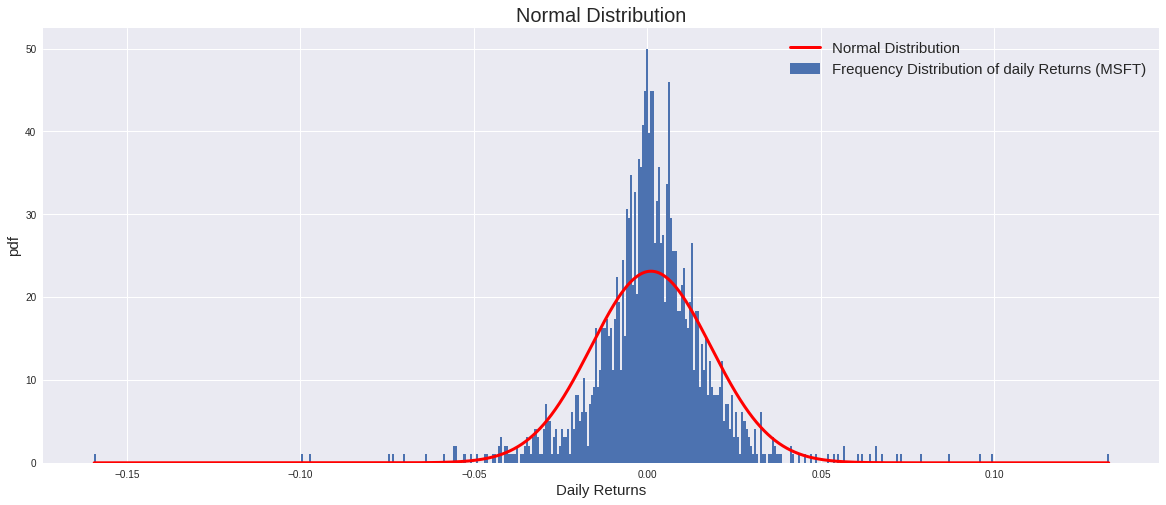

In [113]:
plt.figure(figsize = (20, 8))
plt.hist(msft.log_ret, bins = 500, density = True, label = "Frequency Distribution of daily Returns (MSFT)")
plt.plot(x, y, linewidth = 3, color = "red", label = "Normal Distribution")
plt.title("Normal Distribution", fontsize = 20)
plt.xlabel("Daily Returns", fontsize = 15)
plt.ylabel("pdf", fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

__-> MSFT Returns exhibit "Fat Tails" (extreme positive/negative outcomes).__ 

__Testing the normality of MSFT Returns based on the sample (Oct 2014 to May 2021):__ <br>
__-> Hypothesis Test with H0 Hypothesis: MSFT Returns (full population) follow a normal Distribution.__ 

In [114]:
z_stat, p_value = stats.normaltest(msft.log_ret.dropna())

In [115]:
z_stat # high values -> reject H0

326.8451656349759

In [116]:
p_value # low values (close to zero) -> reject H0

1.0628551078061005e-71

In [117]:
round(p_value, 10)

0.0

__-> Assuming that MSFT Returns (generally) follow a Normal Distribution, there is 0% probability that we get that extreme outcomes in a sample.__ 

__Take Home: MSFT Returns don´t follow a Normal Distribution as they exhibit "Fat Tails". Extreme Events/Outcomes are not reflected in the Mean-Variance Analysis. The Standard Deviation of Returns underestimates true Risk.__

## Annualizing Mean Return and Std of Returns

In [118]:
msft = pd.read_csv("msft.csv", index_col = "Date", parse_dates = ["Date"], usecols = ["Date", "Price"])

In [119]:
msft

,Price
Date,
2014-10-01,45.9000
2014-10-02,45.7600
2014-10-03,46.0900
2014-10-06,46.0900
2014-10-07,45.5300
...,...
2021-05-24,250.7800
2021-05-25,251.7200
2021-05-26,251.4900


In [120]:
msft["log_ret"] = np.log(msft.Price / msft.Price.shift())

In [121]:
msft.log_ret.agg(["mean", "std"]) # mean and std based on daily returns

mean   0.0010
std    0.0172
Name: log_ret, dtype: float64

In [122]:
ann_mu = msft.log_ret.mean() * 252 
ann_mu

0.25466357960390684

In [123]:
cagr = np.exp(ann_mu) - 1 # don´t mix up with cagr
cagr

0.2900275562814376

In [124]:
ann_std = msft.log_ret.std() * np.sqrt(252) 
ann_std

0.27381663717464577

In [125]:
ann_std = np.sqrt(msft.log_ret.var() * 252) # annualized std of returns (Alt 2)
ann_std

0.27381663717464577

## Resampling / Smoothing

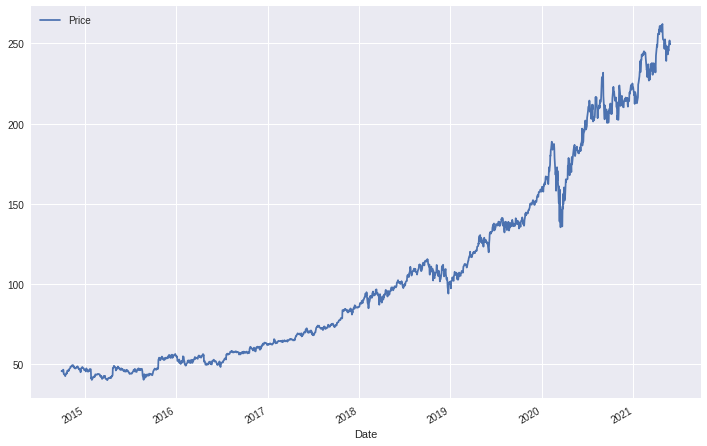

In [126]:
msft.Price.plot(figsize = (12, 8))
plt.legend()
plt.show()

In [127]:
monthly = msft.Price.resample("M").last() ## resample to monthly (month end)
monthly

Date
2014-10-31    46.9500
2014-11-30    47.8100
2014-12-31    46.4500
2015-01-31    40.4000
2015-02-28    43.8500
               ...   
2021-01-31   231.9600
2021-02-28   232.3800
2021-03-31   235.7700
2021-04-30   252.1800
2021-05-31   249.6800
Freq: M, Name: Price, Length: 80, dtype: float64

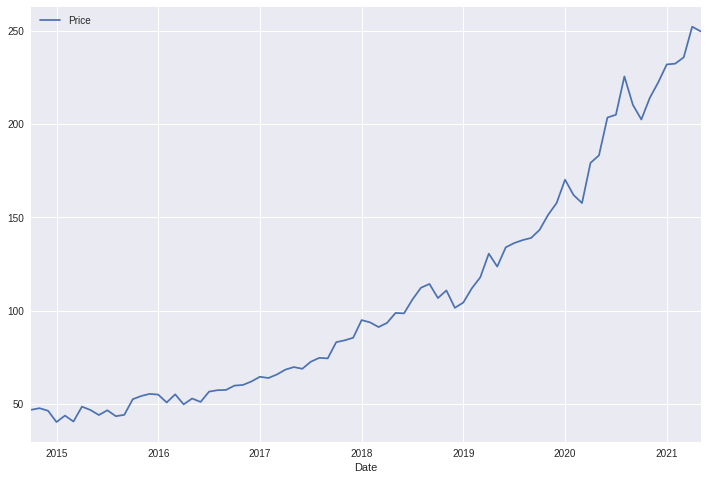

In [128]:
monthly.plot(figsize = (12, 8))
plt.legend()
plt.show()

__How will the Mean-Variance Analysis change with smoothed data?__

In [129]:
freqs = ["A", "Q", "M", "W-Fri", "D"]
periods = [1, 4, 12, 52, 252]
ann_mean = []
ann_std = []

In [130]:
for i in range(5):
    resamp = msft.Price.resample(freqs[i]).last() # resample
    ann_mean.append(np.log(resamp / resamp.shift()).mean() * periods[i]) # calc. annualized mean
    ann_std.append(np.log(resamp / resamp.shift()).std() * np.sqrt(periods[i])) # calc. annualized std

In [131]:
ann_mean

[0.24025765527761309,
 0.258739013375891,
 0.253837495704879,
 0.25319415287153213,
 0.25289038013157533]

In [132]:
summary = pd.DataFrame(data = {"ann_std":ann_std, "ann_mean":ann_mean}, index = freqs)
summary

,ann_std,ann_mean
A,0.1272,0.2403
Q,0.1793,0.2587
M,0.2050,0.2538
W-Fri,0.2309,0.2532
D,0.2674,0.2529


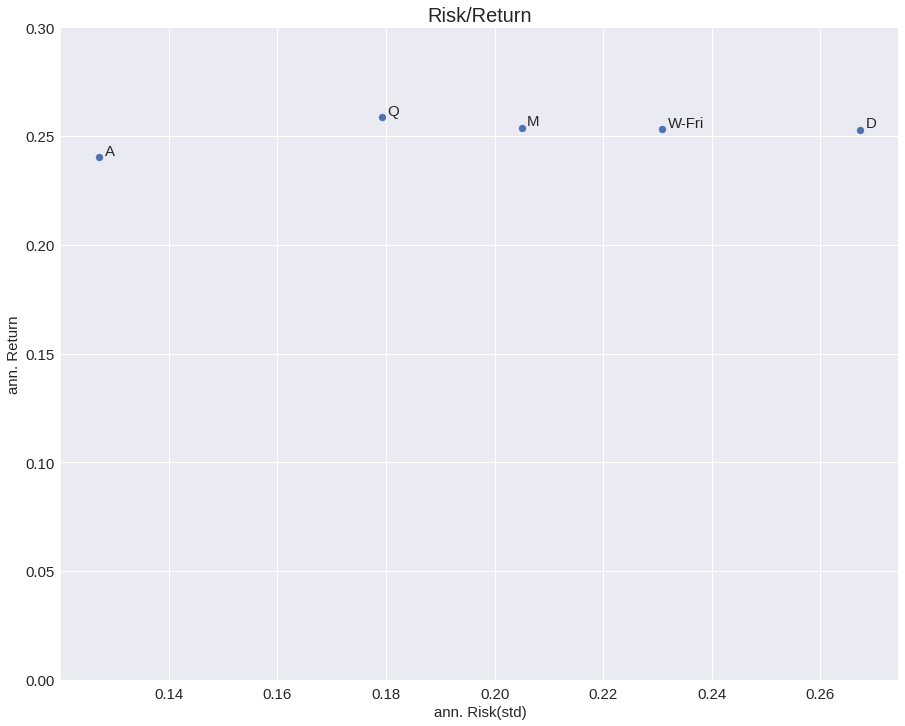

In [133]:
summary.plot(kind = "scatter", x = "ann_std", y = "ann_mean", figsize = (15,12), s = 50, fontsize = 15)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "ann_std"]+0.001, summary.loc[i, "ann_mean"]+0.001), size = 15)
plt.ylim(0, 0.3)
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

__-> Smoothing reduces (observed) Risk__. 

Dubious practices:
- Managing (Manipulating) Performance in Performance Reportings.
- Comparing assets with different granularity and pricing mechanisms -> e.g. non-listed (alternative assets) vs. listed assets 
- Adjusting granularity to investor´s (average) holding period -> Volatility is still there.

## Rolling Statistics

__(Another) general Rule in Finance/Investing: Past performance is not an indicator of future performance__.

In [134]:
msft

,Price,log_ret
Date,,
2014-10-01,45.9000,NaN
2014-10-02,45.7600,-0.0031
2014-10-03,46.0900,0.0072
2014-10-06,46.0900,0.0000
2014-10-07,45.5300,-0.0122
...,...,...
2021-05-24,250.7800,0.0226
2021-05-25,251.7200,0.0037
2021-05-26,251.4900,-0.0009


In [135]:
ann_mu = msft.log_ret.mean() * 252 # annualized mean return
ann_mu

0.25466357960390684

In [136]:
ann_std = msft.log_ret.std() * np.sqrt(252) # annualized std of returns (Alt 1)
ann_std

0.27381663717464577

__Are Return and Risk constant over time? No, of course not! They change over time.__

__Let´s measure/quantify this with rolling statistics!__

In [137]:
window = 252 # rolling window 252 trading days (~ 1 Year)

In [138]:
msft.log_ret.rolling(window = 252)

Rolling [window=252,center=False,axis=0,method=single]

In [139]:
msft.log_ret.rolling(window = 252).sum() # Alt 1

Date
2014-10-01      NaN
2014-10-02      NaN
2014-10-03      NaN
2014-10-06      NaN
2014-10-07      NaN
              ...  
2021-05-24   0.3123
2021-05-25   0.3267
2021-05-26   0.3244
2021-05-27   0.3180
2021-05-28   0.3093
Name: log_ret, Length: 1677, dtype: float64

In [140]:
roll_mean = msft.log_ret.rolling(window = 252).mean() * 252 # Alt 2
roll_mean

Date
2014-10-01      NaN
2014-10-02      NaN
2014-10-03      NaN
2014-10-06      NaN
2014-10-07      NaN
              ...  
2021-05-24   0.3123
2021-05-25   0.3267
2021-05-26   0.3244
2021-05-27   0.3180
2021-05-28   0.3093
Name: log_ret, Length: 1677, dtype: float64

In [141]:
roll_mean.iloc[250:]

Date
2015-09-29       NaN
2015-09-30       NaN
2015-10-01   -0.0285
2015-10-02   -0.0042
2015-10-05    0.0116
               ...  
2021-05-24    0.3123
2021-05-25    0.3267
2021-05-26    0.3244
2021-05-27    0.3180
2021-05-28    0.3093
Name: log_ret, Length: 1427, dtype: float64

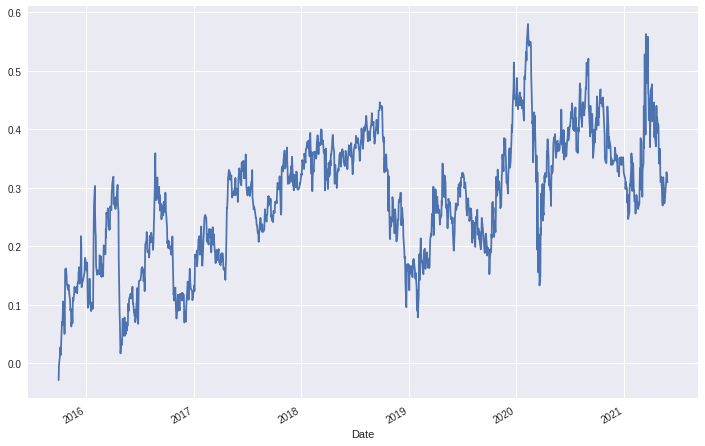

In [142]:
roll_mean.plot(figsize = (12, 8))
plt.show()

In [143]:
roll_std = msft.log_ret.rolling(window = 252).std() * np.sqrt(252)
roll_std

Date
2014-10-01      NaN
2014-10-02      NaN
2014-10-03      NaN
2014-10-06      NaN
2014-10-07      NaN
              ...  
2021-05-24   0.2794
2021-05-25   0.2792
2021-05-26   0.2792
2021-05-27   0.2794
2021-05-28   0.2792
Name: log_ret, Length: 1677, dtype: float64

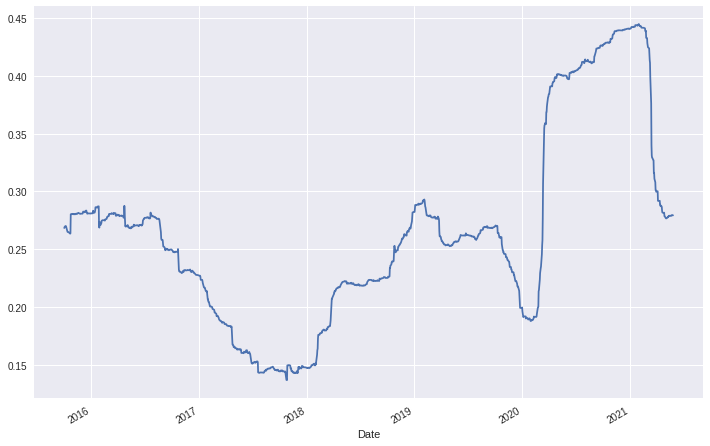

In [144]:
roll_std.plot(figsize = (12, 8))
plt.show()

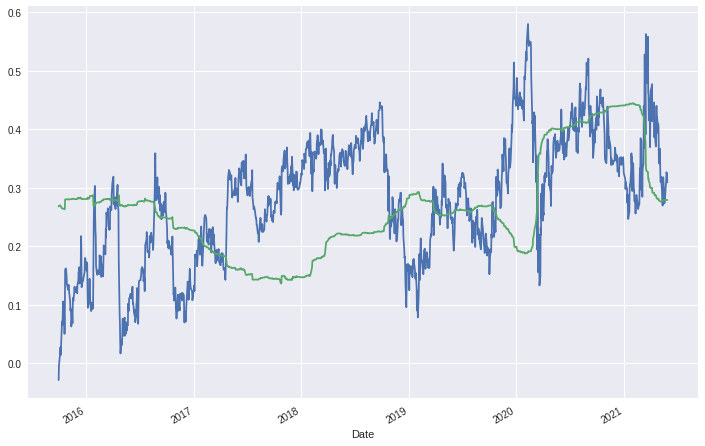

In [145]:
roll_mean.plot(figsize = (12, 8))
roll_std.plot()
plt.show()

In [146]:
sma_window = 50

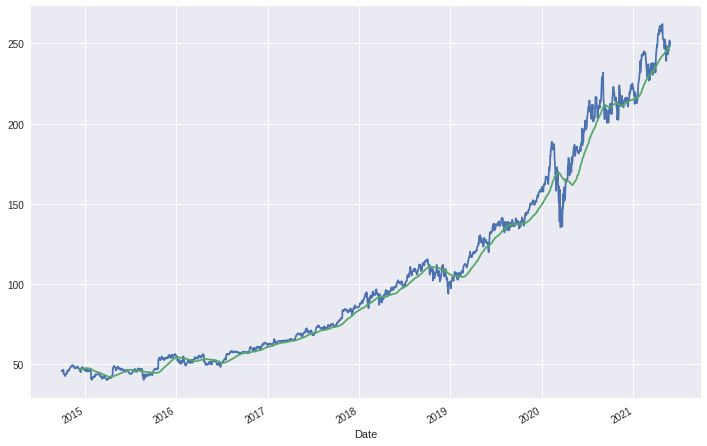

In [147]:
msft.Price.plot(figsize = (12, 8))
msft.Price.rolling(sma_window).mean().plot()
plt.show()

## Covariance and Correlation

Do instruments/assets __move together__ (and to what extent)? <br>

Three cases:
- unrelated (__no__ relationship/correlation)
- moving together (__positive__ relationship/correlation)
- moving in opposite directions (__negative__ relationship/correlation) 

__-> Correlation between instruments/assets play an important role in portfolio management.__

In [148]:
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:.4f}'.format
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [149]:
close = pd.read_csv("close.csv", index_col = "Date", parse_dates = ["Date"])
close

,BA,BTC-USD,EURUSD=X,GC=F,MSFT,^DJI
Date,,,,,,
2014-10-01,124.6700,383.6150,1.2628,1214.6000,45.9000,16804.7109
2014-10-02,124.1700,375.0720,1.2624,1214.2000,45.7600,16801.0508
2014-10-03,126.3600,359.5120,1.2671,1192.2000,46.0900,17009.6895
2014-10-04,NaN,328.8660,NaN,NaN,NaN,NaN
2014-10-05,NaN,320.5100,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2021-05-27,250.7000,38436.9688,1.2193,1895.7000,249.3100,34464.6406
2021-05-28,247.0200,35697.6055,1.2193,1902.5000,249.6800,34529.4492
2021-05-29,NaN,34616.0664,NaN,NaN,NaN,NaN


In [150]:
close["USDEUR=X"] = 1/close["EURUSD=X"]
close

,BA,BTC-USD,EURUSD=X,GC=F,MSFT,^DJI,USDEUR=X
Date,,,,,,,
2014-10-01,124.6700,383.6150,1.2628,1214.6000,45.9000,16804.7109,0.7919
2014-10-02,124.1700,375.0720,1.2624,1214.2000,45.7600,16801.0508,0.7921
2014-10-03,126.3600,359.5120,1.2671,1192.2000,46.0900,17009.6895,0.7892
2014-10-04,NaN,328.8660,NaN,NaN,NaN,NaN,NaN
2014-10-05,NaN,320.5100,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2021-05-27,250.7000,38436.9688,1.2193,1895.7000,249.3100,34464.6406,0.8202
2021-05-28,247.0200,35697.6055,1.2193,1902.5000,249.6800,34529.4492,0.8201
2021-05-29,NaN,34616.0664,NaN,NaN,NaN,NaN,NaN


In [151]:
returns = close.apply(lambda x: np.log(x.dropna() / x.dropna().shift()))
returns

,BA,BTC-USD,EURUSD=X,GC=F,MSFT,^DJI,USDEUR=X
Date,,,,,,,
2014-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-10-02,-0.0040,-0.0225,-0.0003,-0.0003,-0.0031,-0.0002,0.0003
2014-10-03,0.0175,-0.0424,0.0037,-0.0183,0.0072,0.0123,-0.0037
2014-10-04,NaN,-0.0891,NaN,NaN,NaN,NaN,NaN
2014-10-05,NaN,-0.0257,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2021-05-27,0.0379,-0.0221,-0.0046,-0.0029,-0.0087,0.0041,0.0046
2021-05-28,-0.0148,-0.0739,0.0000,0.0036,0.0015,0.0019,-0.0000
2021-05-29,NaN,-0.0308,NaN,NaN,NaN,NaN,NaN


In [152]:
returns.cov() # covariance (hard to interpret)

,BA,BTC-USD,EURUSD=X,GC=F,MSFT,^DJI,USDEUR=X
BA,0.0007,0.0001,0.0000,0.0000,0.0002,0.0002,-0.0000
BTC-USD,0.0001,0.0016,-0.0000,0.0000,0.0001,0.0001,0.0000
EURUSD=X,0.0000,-0.0000,0.0000,0.0000,-0.0000,0.0000,-0.0000
GC=F,0.0000,0.0000,0.0000,0.0001,0.0000,-0.0000,-0.0000
MSFT,0.0002,0.0001,-0.0000,0.0000,0.0003,0.0002,0.0000
^DJI,0.0002,0.0001,0.0000,-0.0000,0.0002,0.0001,-0.0000
USDEUR=X,-0.0000,0.0000,-0.0000,-0.0000,0.0000,-0.0000,0.0000


In [153]:
returns.corr() # correlation coefficient (easy to interpret)

,BA,BTC-USD,EURUSD=X,GC=F,MSFT,^DJI,USDEUR=X
BA,1.0000,0.1328,0.0346,0.0079,0.4221,0.7253,-0.0346
BTC-USD,0.1328,1.0000,-0.0167,0.0968,0.1423,0.1587,0.0167
EURUSD=X,0.0346,-0.0167,1.0000,0.0587,-0.0186,0.0297,-1.0000
GC=F,0.0079,0.0968,0.0587,1.0000,0.0012,-0.0062,-0.0587
MSFT,0.4221,0.1423,-0.0186,0.0012,1.0000,0.7422,0.0186
^DJI,0.7253,0.1587,0.0297,-0.0062,0.7422,1.0000,-0.0297
USDEUR=X,-0.0346,0.0167,-1.0000,-0.0587,0.0186,-0.0297,1.0000


Three cases:
- no correlation: __correlation coefficient == 0__
- moving together: __0 < correlation coefficient <= 1__ (positive)
- moving in opposite directions: __-1 <= correlation coefficient < 0__ (negative)

In [154]:
import seaborn as sns

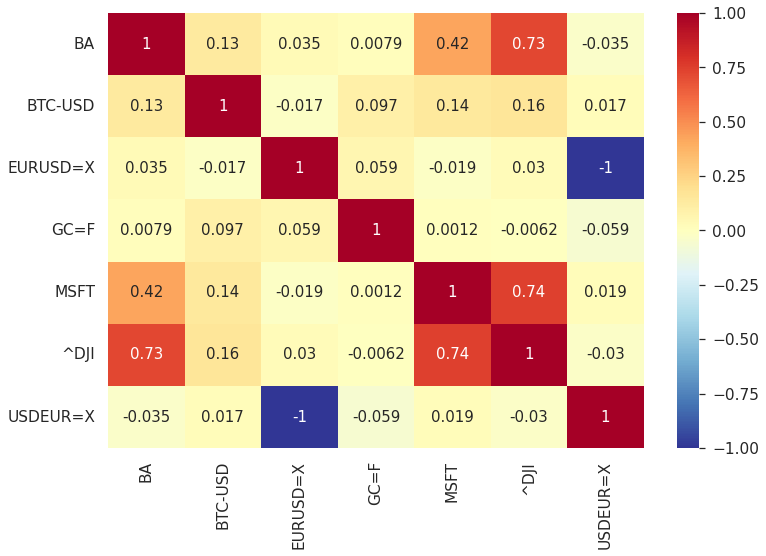

In [155]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.4)
sns.heatmap(returns.corr(), cmap = "RdYlBu_r", annot = True, annot_kws={"size":15}, vmin = -1, vmax = 1)
plt.show()

__Take Home: Similar assets are (highly) positive correlated. Different assets exhibit low/no/negative correlation.__ <br>
-> In portfolio management it´s beneficial to have assets with low/no/negative correlation (portfolio diversification effect).

## Portfolio of Assets and Portfolio Returns

In [156]:
prices = pd.DataFrame(data = {"Asset_A": [100, 112], "Asset_B":[100, 104]}, index = [0, 1])
prices

,Asset_A,Asset_B
0,100,100
1,112,104


In [157]:
prices["Total"] = prices.Asset_A + prices.Asset_B

In [158]:
prices

,Asset_A,Asset_B,Total
0,100,100,200
1,112,104,216


In [159]:
returns = prices.pct_change() # simple returns
returns

,Asset_A,Asset_B,Total
0,NaN,NaN,NaN
1,0.1200,0.0400,0.0800


In [160]:
0.5 * 0.12 + 0.5 * 0.04 # correct (portfolio return == weighted average of simple returns)

0.08

In [161]:
log_returns = np.log(prices / prices.shift()) # log returns
log_returns

,Asset_A,Asset_B,Total
0,NaN,NaN,NaN
1,0.1133,0.0392,0.0770


In [162]:
0.5 * log_returns.iloc[1,0] + 0.5 * log_returns.iloc[1,1] # incorrect (portfolio return != weighted average of log returns)

0.0762746992301423